In [3]:
# Deven Sharma 
import tensorflow as tf

In [27]:
a =tf.constant(2)
a # tconst 2:0 means how many times a consant is created 
# doesnt represnt value 
b=tf.constant(10)
c=a + b # will not do addition like this 
# so in order to perform any operation we need to have tensor session
sess =tf.Session()
sess.run(c)

12

In [38]:
# we don't need to write session again and again

session = tf.Session()
session.run(c)

12

In [51]:
# understanding the concept of variables 
# some data needs to be changed
var1 = tf.Variable(10)
var2 =tf.Variable(20)
session = tf.Session()
session.run(tf.global_variables_initializer()) # initialize with the session
sum1 =tf.add(var1,var2)
session.run(sum1) # now what the problem with the tensor flow is that we need to explicity define
# that we are using the varibles

30

In [55]:
# how to assign the value 
assign = var1.assign(1002)
session.run(assign)
session.run(sum1)



1022

In [64]:
# new type of way to store data using placeholders which helps to assign the values dynamically
x = tf.placeholder('int32')
y= x*tf.constant(10)

session.run(y,feed_dict = {x:10})  # pass the feed dictionary that specify the value of the placholder
# and the comman that need to be run

100

In [90]:
# loading the dataset 
# in the tensorflow

from tensorflow.examples.tutorials.mnist import input_data

mnist =input_data.read_data_sets('MNIST_data/',one_hot ="True")
mnist.train.images.shape
print(mnist.train.labels.shape)
mnist.train.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 10)


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [111]:
import numpy as np

first_image =  mnist.train.images[10]
new_image= first_image.reshape((28,28))
new_image = np.array(new_image,dtype ='float')

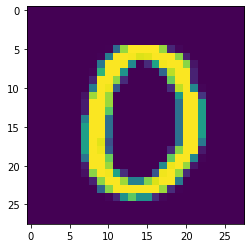

In [113]:
import matplotlib.pyplot as plt
plt.imshow(new_image)

In [116]:
with tf.Session() as sess:
    print(tf.random_normal([1]).eval())
    # so one function is random_normal([n,m]) it takes n*m matrix

[-1.3838383]


In [119]:
mnist.train.images.shape

(55000, 784)

In [168]:
n_input = 784
hidden1 =256
hidden2 =256
bias1 =256
bias2 =10
classes = 10

In [160]:
weights ={
    'h1':tf.Variable(tf.random_normal([n_input,hidden1])),
    'h2':tf.Variable(tf.random_normal([hidden1,hidden2])),
    'out' :tf.Variable(tf.random_normal([hidden2,classes])),
}    # initialzed the weights 

In [296]:
biases  = {
    'h1' :tf.Variable(tf.random_normal([hidden1])),
    'h2':tf.Variable(tf.random_normal([hidden2])),
     'out':tf.Variable(tf.random_normal([classes]))
} #initilized the biases 

In [297]:
def forward_pass(x,weights,biases):
   
    layer1_inp = tf.add(tf.matmul(x,weights['h1']),biases['h1'])
   
    layer1_op = tf.nn.relu(layer1_inp) # relu is a neural networks activation function
    layer2_inp = tf.add(tf.matmul(layer1_op,weights['h2']),biases['h2'])
    layer2_op = tf.nn.relu(layer2_inp)
     
    act_op =  tf.add(tf.matmul(layer2_op,weights['out']),biases['out'])
    
    return act_op
    

In [334]:
x =tf.placeholder('float',[None,n_input])
y =tf.placeholder('int32',[None,classes])

session = tf.Session()
# session.run(tf.global_variables_initializer())
pred = forward_pass(x,weights,biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits =pred,labels=y)) # this is cost function
# how to use the inbuilt optimizer let's see
tf.train
prediction  =tf.argmax(pred,1)
label = tf.argmax(y,1)
transformed =tf.equal(prediction,label)
# pred1,temp,actual = session.run([prediction,transformed,label],feed_dict={x:mnist.train.images,y:mnist.train.labels})

 

In [340]:
# tf we need to find the cost we can use the cross entropy
# the cross entropy function takes two things one is logit =prediction and othe is label
# firstly using the argmax for finding the max value of the specific index 

# here we will be using the cross entropy 
# let use an optimizer
optimizer = tf.train.AdamOptimizer(learning_rate =0.01)
optimize = optimizer.minimize(cost)
session.run(tf.global_variables_initializer())
for i in range(2):
   print( session.run([cost],feed_dict ={x:mnist.train.images,y:mnist.train.labels}))
   
    # one more thing can be done 
# batch gradient can be applied as well

[2920.575]
[2920.575]


In [341]:
# so how does an optimizer work actually what happend that the optimizer find out the weights whsose value
# depend on the cost then it only changes those weights 


In [343]:
# working  with the keras
# things to do 
# create a model
# define architcture =====>
                            #layers =>units =>activation_function=>compiling
    
    # we can create a sequential models 
    
    # we can have multiple input and output model
    # we can have functional(APi) model
    

In [365]:
from keras.models import Sequential
from keras.layers import Activation, Dense

In [374]:
model =Sequential()
model.add(Dense(30,input_dim = 30,activation ='relu'))
model.add(Dense(30,activation ='relu'))
model.add(Dense(1,activation ='sigmoid'))


model.compile(optimizer = 'adam',loss ='binary_crossentropy',metrics =['accuracy'])
from sklearn import datasets

data = datasets.load_breast_cancer()

from sklearn.model_selection import train_test_split

x_train , x_test ,y_train, y_test  = train_test_split(data.data,data.target ,test_size = 0.3,random_state =0)

model.compile(optimizer = 'adam',loss ='binary_crossentropy',metrics =['accuracy'])  # loss is differnct for different problems
# optimizer tries to optimize the cost
from sklearn import datasets

data = datasets.load_breast_cancer()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
st =StandardScaler()
x_train , x_test ,y_train, y_test = train_test_split(data.data,data.target ,test_size = 0.3,random_state =0)
x_train = st.fit_transform(x_train)
x_test= st.fit_transform(x_test)
model.fit(x_train,y_train,epochs =20,batch_size =110)

In [426]:
model.predict(x_test)

array([[0.0000000e+00],
       [9.8561203e-01],
       [1.0000000e+00],
       [9.9999899e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.1615634e-02],
       [9.9965334e-01],
       [1.0000000e+00],
       [2.1324158e-03],
       [3.9646029e-04],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [9.9985224e-01],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [9.9995732e-01],
       [0.0000000e+00],
       [9.9999976e-01],
       [0.0000000e+00],
       [4.1723251e-06],
       [1.000000